<a href="https://colab.research.google.com/github/Albatrous/IoT_DataFiltering/blob/main/Signal_Data_Filtering_MVA_LPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Header

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

#Pembacaan File .txt

In [ ]:
def addTableName(dataframe):
  name = ["Id", "Code", "Timestamp", "x", "y" ,"z"]
  dataframe = np.array(dataframe)
  df = pd.DataFrame(data=dataframe, columns=name)
  df["z"] = df["z"].str.replace(";","")
  df["z"] = df["z"].astype("float")
  df["x"] = df["x"].astype("float")
  df["y"] = df["y"].astype("float")
  return df
  

dfap = addTableName(pd.read_csv('data_1611_accel_phone.txt'))
dfaw = addTableName(pd.read_csv('data_1611_accel_watch.txt'))
dfgp = addTableName(pd.read_csv('data_1611_gyro_phone.txt'))
dfgw = addTableName(pd.read_csv('data_1611_gyro_watch.txt'))

Filtering berdasarkan aktivitas

In [ ]:
drinking_from_cup = dfgw[dfgw["Code"] == "K"]
walking = dfgw[dfgw["Code"] == "A"]

#Deklarasi data

In [ ]:
#Assign dataset ke masing-masing kolom/variabel A,B,C

A_AP = walking.iloc[:, 0] #index
B_AP = walking.iloc[:, 3] #sumbu X
C_AP = walking.iloc[:, 4] #sumbu Y
D_AP = walking.iloc[:, 5] #sumbu Z
Timestamp = walking.iloc[:, 2] # Timestamp

0       0.689081
1      -0.984449
2      -1.625739
3      -0.909881
4      -1.370075
          ...   
3597   -0.313479
3598   -1.270086
3599   -2.416311
3600   -3.045882
3601   -1.360634
Name: x, Length: 3602, dtype: float64

#MVA FILTER

In [ ]:
#Mengembalikan MVA dari dataset
def MVA_Filter(data,window_size):
  hasil = data.rolling(window=window_size).mean()
  return hasil

Untuk Kolom B (x axis)

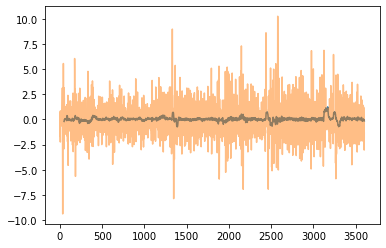

In [ ]:
MVA_Filter(B_AP,50).plot(label ='MVA')
plt.plot(B_AP, label='B', alpha = 0.5)
MVA_B = MVA_Filter(B_AP,50)

Untuk Kolom C (y axis)

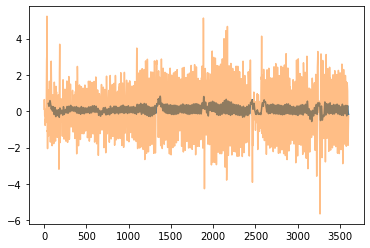

In [ ]:
MVA_Filter(C_AP,50).plot(label ='MVA')
plt.plot(C_AP, label='C', alpha = 0.5)
MVA_C = C_AP.rolling(window=50).mean()

Untuki Kolom D (z axis)

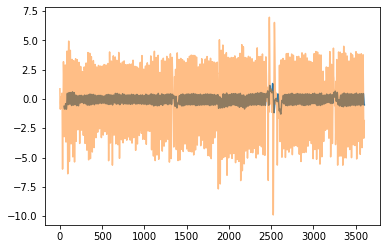

In [ ]:
MVA_Filter(D_AP,50).plot(label ='MVA')
plt.plot(D_AP, label='D', alpha = 0.5)
MVA_D = D_AP.rolling(window=50).mean()

#LPF FILTER

In [ ]:
# https://stackoverflow.com/questions/25191620/

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 5
fs = 20   # sample rate, per data
cutoff = 0.5  # cutoff frequency yang diinginkan dari filter

# ambil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)

Untuk Kolom B (x axis)

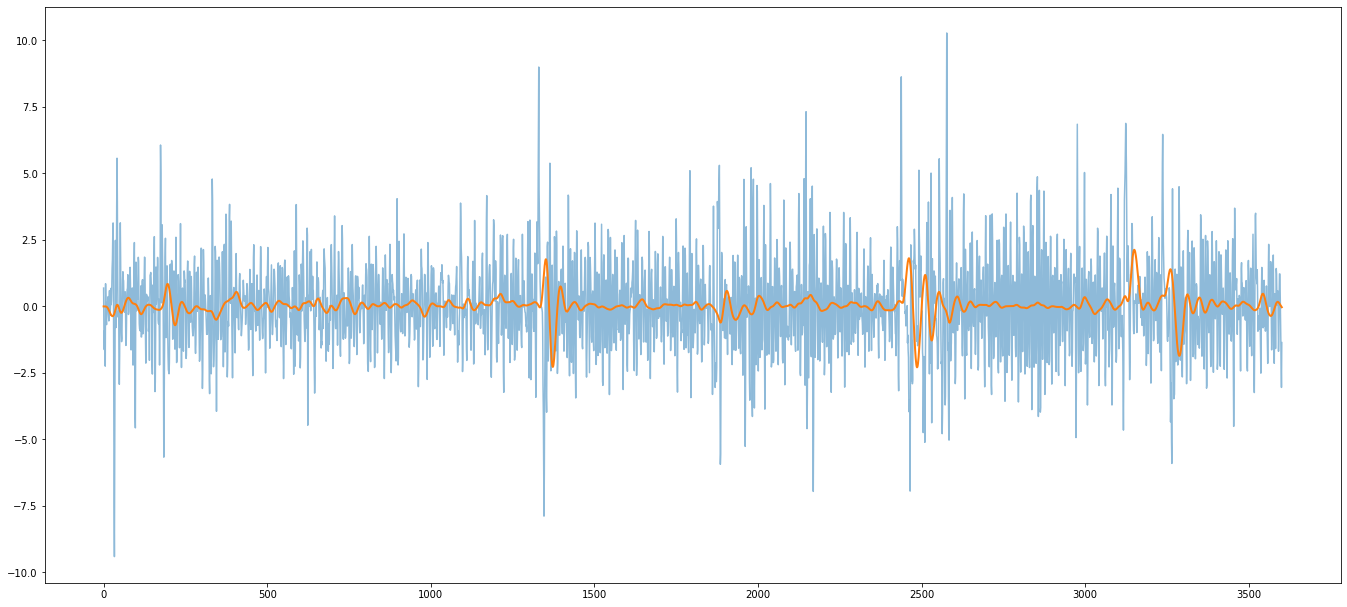

In [ ]:
# y = butter_lowpass_filter(B_AP, cutoff, fs, order)
# plt.plot(B_AP, label='B', alpha = 0.5)
# plt.plot(y, linewidth=2, label='filtered data')

x = butter_lowpass_filter(walking["x"], cutoff, fs, order)
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.plot(walking["x"], label='B', alpha = 0.5)
ax.plot(x, linewidth=2, label='filtered data')

Untuk Kolom C (y axis)

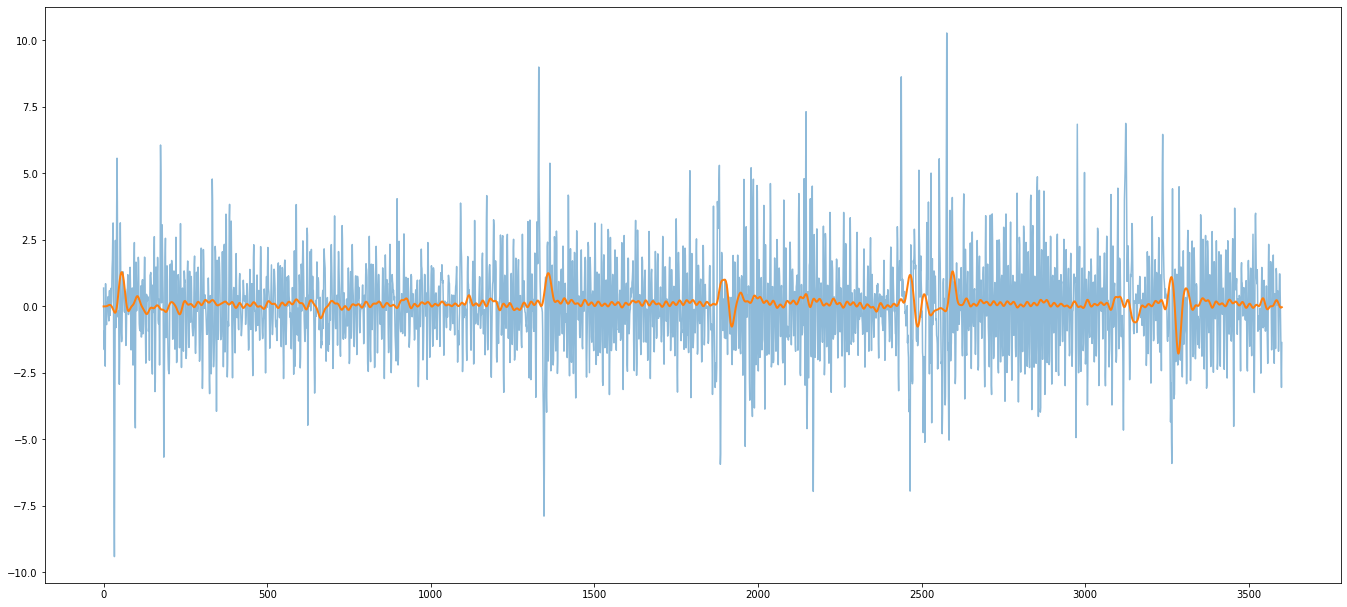

In [ ]:
y = butter_lowpass_filter(C_AP, cutoff, fs, order)
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.plot(B_AP, label='C', alpha = 0.5)
ax.plot(y, linewidth=2, label='filtered data')

Untuk Kolom D (z axis)

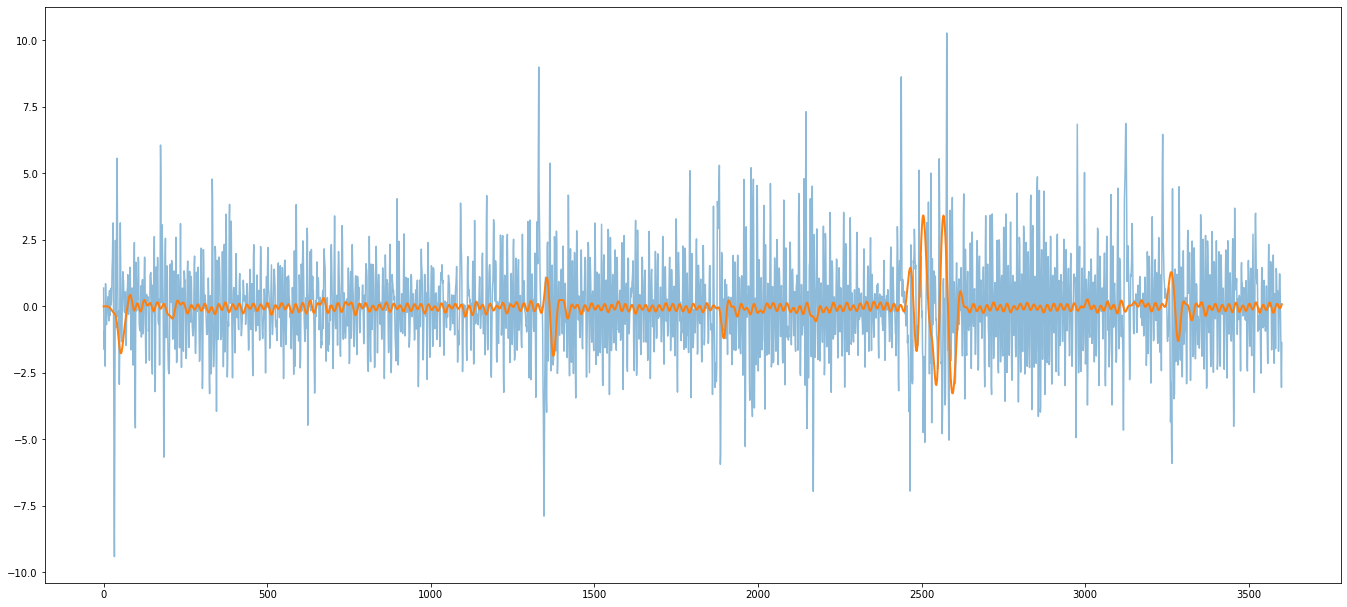

In [ ]:
y = butter_lowpass_filter(D_AP, cutoff, fs, order)
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.plot(B_AP, label='D', alpha = 0.5)
ax.plot(y, linewidth=2, label='filtered data')